We'll use the diffusers library by Hugging Face, which simplifies the process of using diffusion models.

In [ ]:
!pip install diffusers transformers torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

Imports and Setup:

torch is imported for handling the model computations.
StableDiffusionPipeline from the diffusers library is used to load the Stable Diffusion model.

In [ ]:
import torch
from diffusers import StableDiffusionPipeline


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Model Loading:

The model ID CompVis/stable-diffusion-v1-4 refers to the pre-trained Stable Diffusion model.
The model is loaded onto the GPU if available; otherwise, it defaults to the CPU.

In [ ]:
# Load the pre-trained Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda" if torch.cuda.is_available() else "cpu"

Text Prompt:

The text_prompt variable contains the description of the image you want to generate.

In [ ]:
# Define your text prompt
text_prompt = "a flying car "



Image Generation:

The pipeline object processes the text prompt and generates the image.
The guidance_scale parameter controls how much the model should follow the text prompt (higher values make the output more aligned with the prompt).

In [ ]:
pipeline = StableDiffusionPipeline.from_pretrained(model_id)
pipeline = pipeline.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

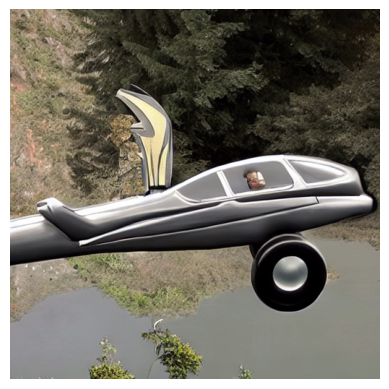

In [ ]:
# Generate the image
with torch.no_grad():
    images = pipeline([text_prompt], guidance_scale=7.5)


# Extract the generated image
image = images.images[0]


import matplotlib.pyplot as plt

# Save the generated image
image.save("generated_image.png")

# Display the generated image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()